In [17]:
import numpy as np
from scipy.stats import norm, fisher_exact
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

In [2]:
p = 0.5
delta_list = np.arange(0, 0.3+1e-3, 0.05)
n = 50
m_list = np.arange(0, 500, 5)

<font size = "5">Functions</font>

In [3]:
# generate empirical p and q with their given true probability through given number of iterations
# paramters: p, q, iterations
# return: empirical_p, empirical_q

# sample_mult value multiplies n and m in every cases, equivalent to multiply the sample size by factor of sample_mult

def empirical_prob(p, q, n, m):
    p_rand = np.random.random((n,))
    q_rand = np.random.random((m,))
    p_rand = (p_rand < p).astype(int)
    q_rand = (q_rand < q).astype(int)
    empirical_p = np.average(p_rand)
    empirical_q = np.average(q_rand) if q_rand.size != 0 else q

    return empirical_p, empirical_q

def empirical_abcd_for_fisher(p, q, n, m):
    p_rand = np.random.random((n,))
    q_rand = np.random.random((m,))
    p_rand = (p_rand < p).astype(int)
    q_rand = (q_rand < q).astype(int)

    a = np.sum(p_rand)
    b = np.sum(q_rand)
    c = n - a
    d = m - b

    return a,b,c,d


<font size = "3">Two Sample p-test</font>
$$ z = \frac{p_1-q_2}{\sqrt{\overline{p}(1-\overline{p})(\frac{1}{n}+\frac{1}{m})}}$$
$$ p = cdf(z)$$

In [4]:
def calculate_two_sample_confidence(p,q,n,m):
    avgp = (n*p+m*q)/(n+m)
    z = (p-q)/np.sqrt(avgp*(1-avgp)*(1/n + 1/m))
    return norm.cdf(z)

<font size = "3">Fisher's Exact Test</font>


| Data | n | m |
| --- | --- | --- |
| 1 | a | b |
| 0 | c | d |

a, b, c, d corresponds to the number of n/m samples that is 1/0

The particular table has probability p:
$$p(a,b,c,d) = \frac{(a+b)!(c+d)!(a+c)!(b+d)!}{a!b!c!d!(a+b+c+d)!}$$

The two-sided Fisher's Exact test gives the p-value:
$$S = \{p_x | p(x,n-x,N-x, M-(n+N)+x) <= p(a,b,c,d), min(0, a-d) <= x <= a+min(b,c)\}$$
$$pvalue(a,b,c,d) = \sum_{s_i\in S}s_i$$


In [21]:
def calculate_fisher_confidence(a,b,c,d):
    table = np.array([[a,b],[c,d]])
    res, pval = fisher_exact(table, alternative = "two-sided")
    return pval

<font size = "5">Application of Two Sample p-test</font>


In [23]:
# confidence_array = []
# for delta in delta_list:
#     confidence_list = []
#     for m in m_list:
#         empirical_p, empirical_q = empirical_prob(p, p+delta, n, m)
#         confidence_list.append(calculate_two_sample_confidence(empirical_p, empirical_q, n, m if m != 0 else 0.0001))
#     confidence_array.append(confidence_list)

rep = 200
confidence_array = []
for delta in delta_list:
    confidence_list = []
    for m in m_list:
        res = 0
        for i in range(rep):
            empirical_p, empirical_q = empirical_prob(p, p+delta, n, m)
            res += calculate_two_sample_confidence(empirical_p, empirical_q, n, m if m != 0 else 0.0001)
        confidence_list.append(res/rep)
    confidence_array.append(confidence_list)


KeyboardInterrupt: 

Text(0.5, 1.0, '$p = 0.5, q = p + \\Delta$')

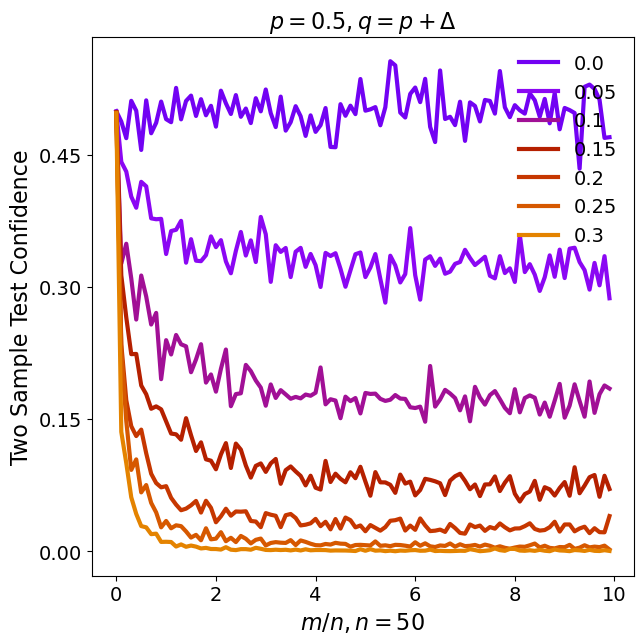

In [7]:
fontsize = 16
labelsize = 14
fig, ax = plt.subplots(figsize=(7, 7))
cmap = [plt.cm.gnuplot(i) for i in np.linspace(0.2, 0.8, len(delta_list))]
for i, delta in enumerate(delta_list):
    ax.plot(m_list/n, confidence_array[i], c=cmap[i], lw=3, label=str(np.round(delta, 2)))
ax.set_ylabel("Two Sample Test Confidence", fontsize=fontsize)
ax.set_xlabel("$m/n, n={}$".format(n), fontsize=fontsize)
ax.tick_params(axis='x', labelsize=labelsize)
ax.tick_params(axis='y', labelsize=labelsize)
ax.legend(fontsize=labelsize, frameon=False)
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.set_title(r"$p = {}, q = p + \Delta$".format(p), fontsize=fontsize)

<font size = "5"> Application of Fisher's Exact Test </font>


In [22]:
calculate_fisher_confidence(10,10,10,10)

1.0

In [26]:
rep = 100
fisher_m_list = np.arange(0, 100, 1)
fisher_confidence_array = []
for delta in delta_list:
    confidence_list = []
    for m in fisher_m_list:
        res = 0
        for i in range(rep):
            a, b, c, d = empirical_abcd_for_fisher(p, p+delta, n, m)
            res += calculate_fisher_confidence(a,b,c,d)
        confidence_list.append(res/rep)
    fisher_confidence_array.append(confidence_list)

Text(0.5, 1.0, '$p = 0.5, q = p + \\Delta$')

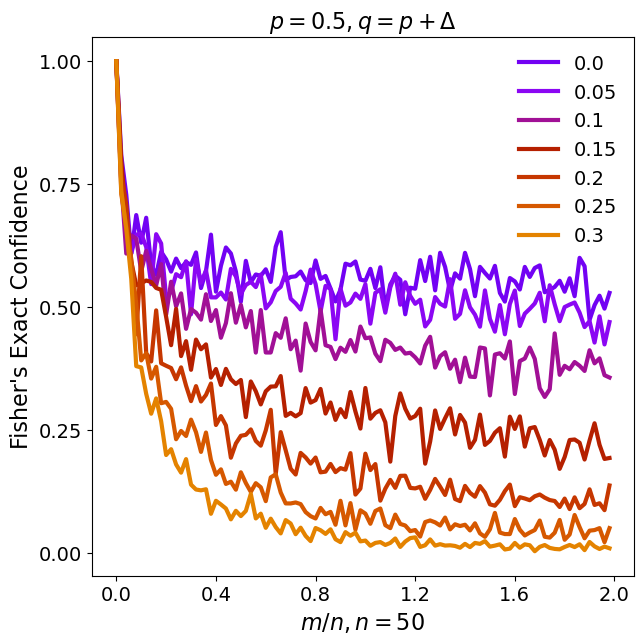

In [27]:
fontsize = 16
labelsize = 14
fig, ax = plt.subplots(figsize=(7, 7))
cmap = [plt.cm.gnuplot(i) for i in np.linspace(0.2, 0.8, len(delta_list))]
for i, delta in enumerate(delta_list):
    ax.plot(fisher_m_list/n, fisher_confidence_array[i], c=cmap[i], lw=3, label=str(np.round(delta, 2)))
ax.set_ylabel("Fisher's Exact Confidence", fontsize=fontsize)
ax.set_xlabel("$m/n, n={}$".format(n), fontsize=fontsize)
ax.tick_params(axis='x', labelsize=labelsize)
ax.tick_params(axis='y', labelsize=labelsize)
ax.legend(fontsize=labelsize, frameon=False)
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.set_title(r"$p = {}, q = p + \Delta$".format(p), fontsize=fontsize)